### Import Modules

In [1]:
#import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings('ignore')

### Import Dataset

In [2]:
df=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/DSData/master/Telecom_customer_churn.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
df.info()
#we can see our dataset but we also want to make sure tha data is clean so as part of the cleaning process,we look at missing 
# values and data types. 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [4]:
#looking for missing data
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [5]:
dfs=df.isnull()
for column in df.columns.values.tolist():
    print(column)
    print(dfs[column].value_counts())
    print("")

customerID
False    7043
Name: customerID, dtype: int64

gender
False    7043
Name: gender, dtype: int64

SeniorCitizen
False    7043
Name: SeniorCitizen, dtype: int64

Partner
False    7043
Name: Partner, dtype: int64

Dependents
False    7043
Name: Dependents, dtype: int64

tenure
False    7043
Name: tenure, dtype: int64

PhoneService
False    7043
Name: PhoneService, dtype: int64

MultipleLines
False    7043
Name: MultipleLines, dtype: int64

InternetService
False    7043
Name: InternetService, dtype: int64

OnlineSecurity
False    7043
Name: OnlineSecurity, dtype: int64

OnlineBackup
False    7043
Name: OnlineBackup, dtype: int64

DeviceProtection
False    7043
Name: DeviceProtection, dtype: int64

TechSupport
False    7043
Name: TechSupport, dtype: int64

StreamingTV
False    7043
Name: StreamingTV, dtype: int64

StreamingMovies
False    7043
Name: StreamingMovies, dtype: int64

Contract
False    7043
Name: Contract, dtype: int64

PaperlessBilling
False    7043
Name: PaperlessBill

In [6]:
df.describe()
#almost 1/3rd of  data is catagorical. 

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


### Exploratory Data Analysis: 

<AxesSubplot:xlabel='Churn', ylabel='count'>

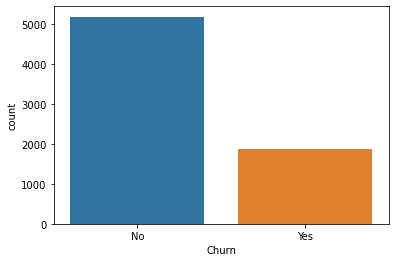

In [7]:
sns.countplot(df['Churn']) 

In [8]:
df['Churn'].value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

In [9]:
colum_name =[]
unique_value=[]
# Iterate through the columns
for col in df:
    if df[col].dtype == 'object':
        # If 2 or fewer unique categories
        colum_name.append(str(col)) 
        unique_value.append(df[col].nunique())
table= pd.DataFrame()
table['Col_name'] = colum_name
table['Value']= unique_value
            
table=table.sort_values('Value',ascending=False)
table

,Col_name,Value
0,customerID,7043
16,TotalCharges,6531
15,PaymentMethod,4
8,OnlineBackup,3
13,Contract,3
12,StreamingMovies,3
11,StreamingTV,3
10,TechSupport,3
9,DeviceProtection,3
7,OnlineSecurity,3


<AxesSubplot:xlabel='Contract', ylabel='count'>

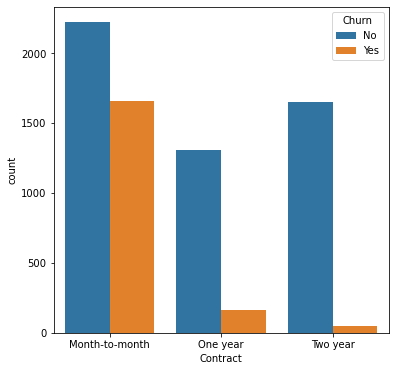

In [10]:
f, ax = plt.subplots(figsize=(6,  6))
sns.countplot(x='Contract',hue='Churn',data=df)
# we can see that month to month contract byeing  custmer is high. 

<AxesSubplot:xlabel='MultipleLines', ylabel='count'>

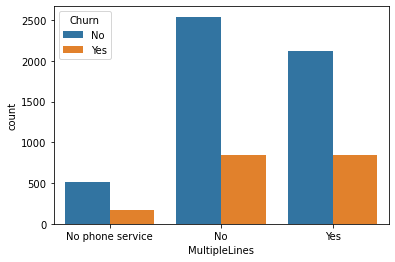

In [11]:
sns.countplot(x='MultipleLines',hue='Churn',data=df)

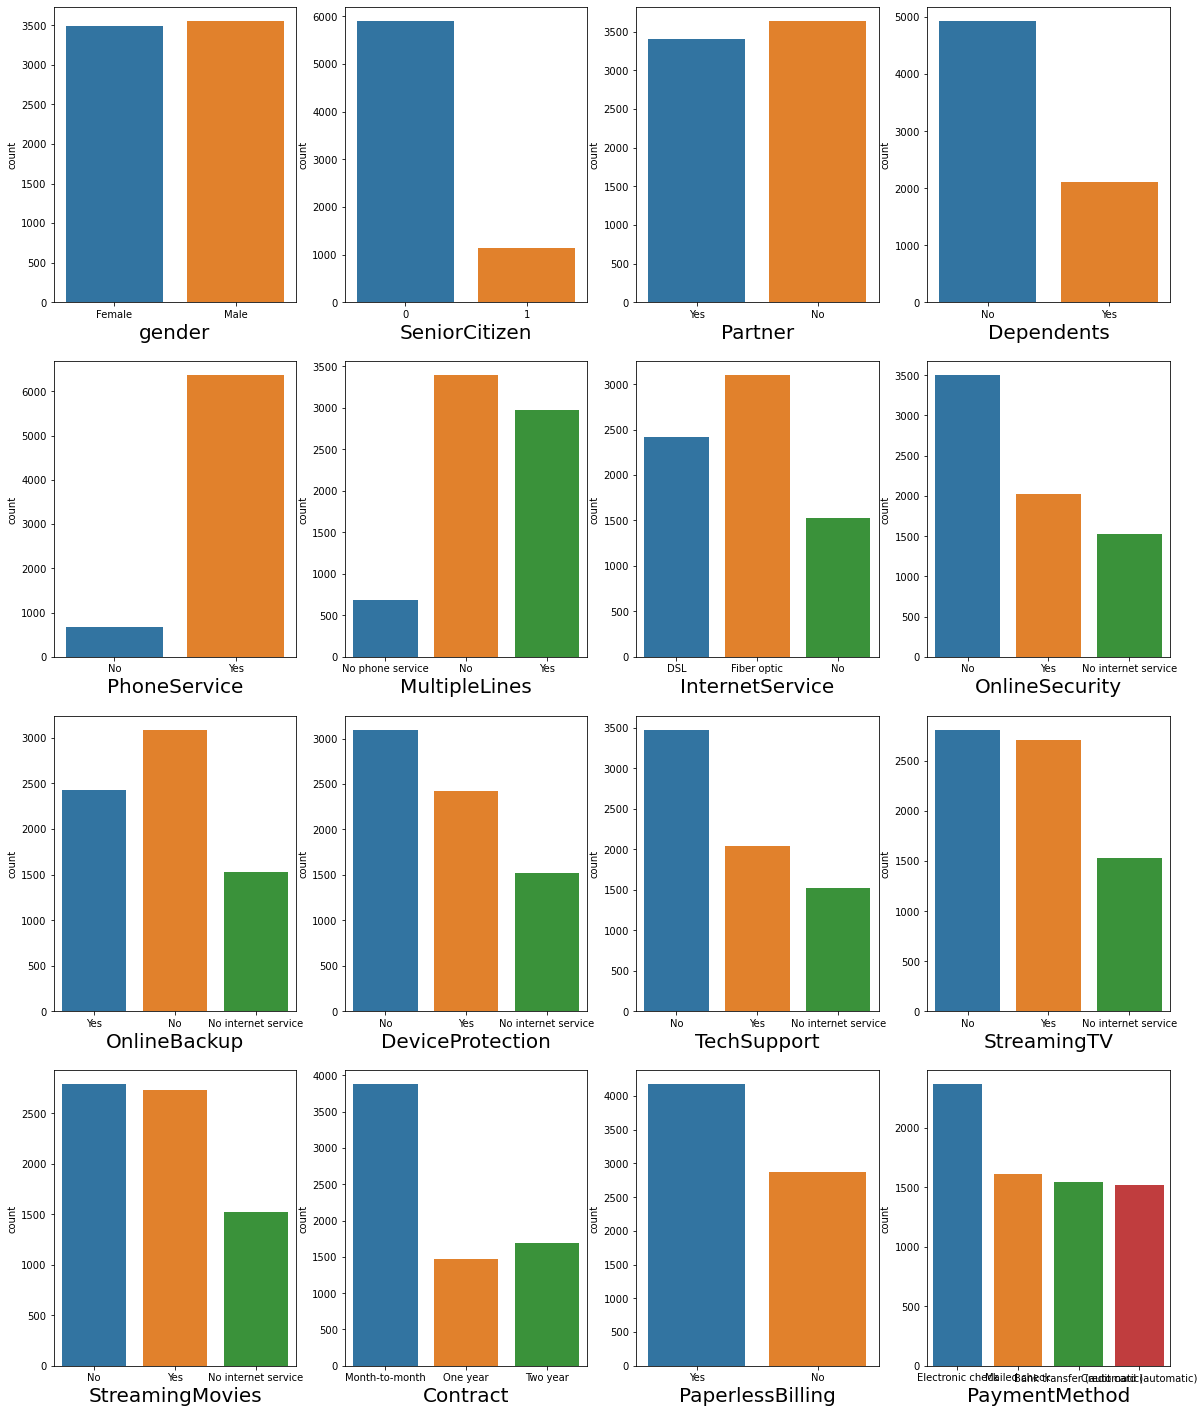

In [12]:
#lets see how data is distributed for every column
plt.figure(figsize=(20,25),facecolor='white')
plotnumber=1
dfs=df.drop(columns=['tenure','customerID'],axis=1)

for column in dfs:
                                    
    if plotnumber<=16:
        ax=plt.subplot(4,4,plotnumber)
        sns.countplot(df[column])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()

In [13]:
objList = df.select_dtypes(include = "object").columns
print (objList)

Index(['customerID', 'gender', 'Partner', 'Dependents', 'PhoneService',
       'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'Contract', 'PaperlessBilling', 'PaymentMethod', 'TotalCharges',
       'Churn'],
      dtype='object')


In [14]:
#Label Encoding for object to numeric conversion
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

for feat in objList:
    df[feat] = le.fit_transform(df[feat].astype(str))
    
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   int32  
 1   gender            7043 non-null   int32  
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   int32  
 4   Dependents        7043 non-null   int32  
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   int32  
 7   MultipleLines     7043 non-null   int32  
 8   InternetService   7043 non-null   int32  
 9   OnlineSecurity    7043 non-null   int32  
 10  OnlineBackup      7043 non-null   int32  
 11  DeviceProtection  7043 non-null   int32  
 12  TechSupport       7043 non-null   int32  
 13  StreamingTV       7043 non-null   int32  
 14  StreamingMovies   7043 non-null   int32  
 15  Contract          7043 non-null   int32  
 16  PaperlessBilling  7043 non-null   int32  


<AxesSubplot:>

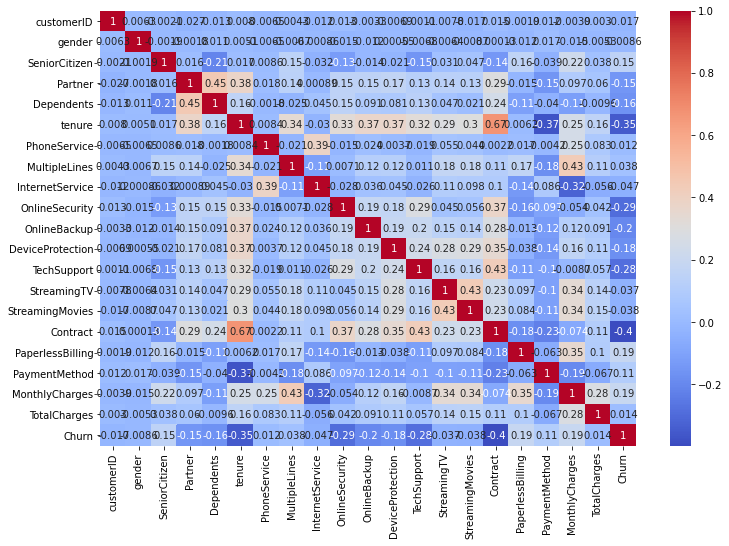

In [15]:
corr=df.corr()
plt.figure(figsize=(12,8))
sns.heatmap(corr,annot=True,cmap='coolwarm')
# almost all columns correleted to each other.

array([[<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>],
       [<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>],
       [<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>],
       [<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>],
       [<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>],
       [<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>],
       [<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabe

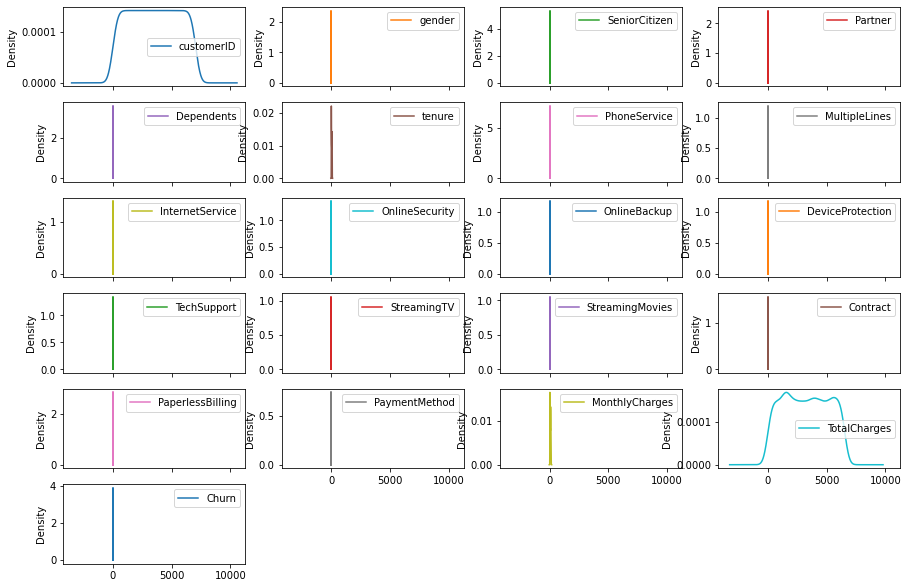

In [16]:
#to check Distribution of skewness
df.plot(kind='kde',subplots=True,layout=(7,4),figsize=(15,12))

In [17]:
df.skew()

customerID          0.000000
gender             -0.019031
SeniorCitizen       1.833633
Partner             0.067922
Dependents          0.875199
tenure              0.239540
PhoneService       -2.727153
MultipleLines       0.118719
InternetService     0.205423
OnlineSecurity      0.416985
OnlineBackup        0.182930
DeviceProtection    0.186847
TechSupport         0.402365
StreamingTV         0.028486
StreamingMovies     0.014657
Contract            0.630959
PaperlessBilling   -0.375396
PaymentMethod      -0.170129
MonthlyCharges     -0.220524
TotalCharges        0.015857
Churn               1.063031
dtype: float64

In [18]:
df_PhoneService=np.log(df['PhoneService'])

In [19]:
df.skew()

customerID          0.000000
gender             -0.019031
SeniorCitizen       1.833633
Partner             0.067922
Dependents          0.875199
tenure              0.239540
PhoneService       -2.727153
MultipleLines       0.118719
InternetService     0.205423
OnlineSecurity      0.416985
OnlineBackup        0.182930
DeviceProtection    0.186847
TechSupport         0.402365
StreamingTV         0.028486
StreamingMovies     0.014657
Contract            0.630959
PaperlessBilling   -0.375396
PaymentMethod      -0.170129
MonthlyCharges     -0.220524
TotalCharges        0.015857
Churn               1.063031
dtype: float64

customerID             AxesSubplot(0.125,0.816017;0.168478x0.0639831)
gender              AxesSubplot(0.327174,0.816017;0.168478x0.0639831)
SeniorCitizen       AxesSubplot(0.529348,0.816017;0.168478x0.0639831)
Partner             AxesSubplot(0.731522,0.816017;0.168478x0.0639831)
Dependents             AxesSubplot(0.125,0.739237;0.168478x0.0639831)
tenure              AxesSubplot(0.327174,0.739237;0.168478x0.0639831)
PhoneService        AxesSubplot(0.529348,0.739237;0.168478x0.0639831)
MultipleLines       AxesSubplot(0.731522,0.739237;0.168478x0.0639831)
InternetService        AxesSubplot(0.125,0.662458;0.168478x0.0639831)
OnlineSecurity      AxesSubplot(0.327174,0.662458;0.168478x0.0639831)
OnlineBackup        AxesSubplot(0.529348,0.662458;0.168478x0.0639831)
DeviceProtection    AxesSubplot(0.731522,0.662458;0.168478x0.0639831)
TechSupport            AxesSubplot(0.125,0.585678;0.168478x0.0639831)
StreamingTV         AxesSubplot(0.327174,0.585678;0.168478x0.0639831)
StreamingMovies     

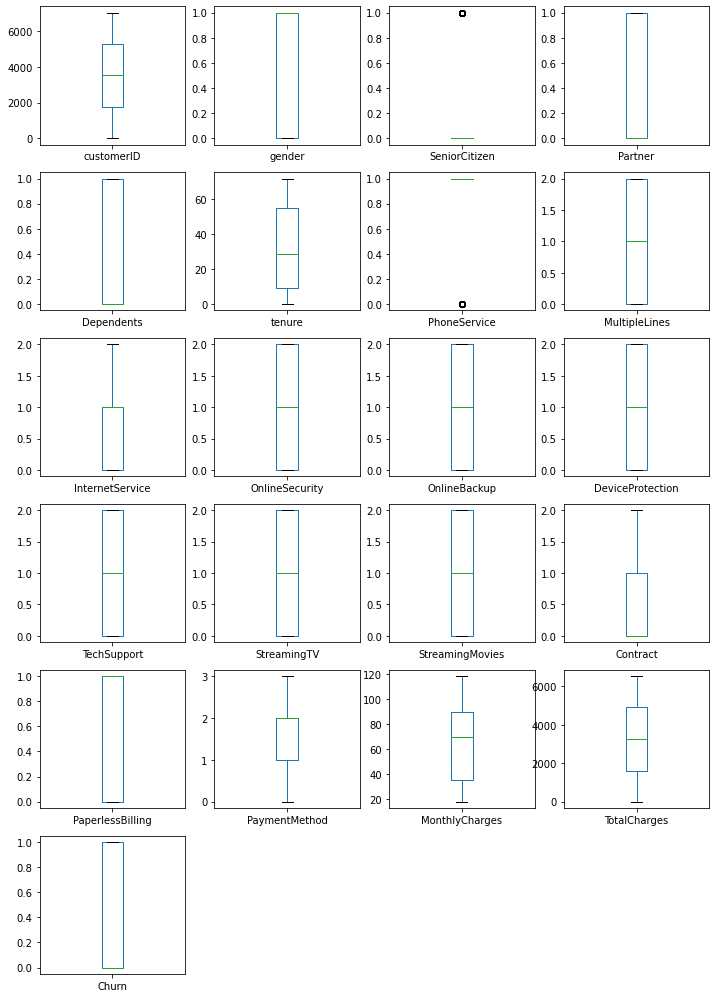

In [20]:
df.plot(kind='box',subplots=True,layout=(10,4),figsize=(12,30)) 
#checking Outlier ,so our data is not haveing any outlier .expect phone services,SeniorCitizen

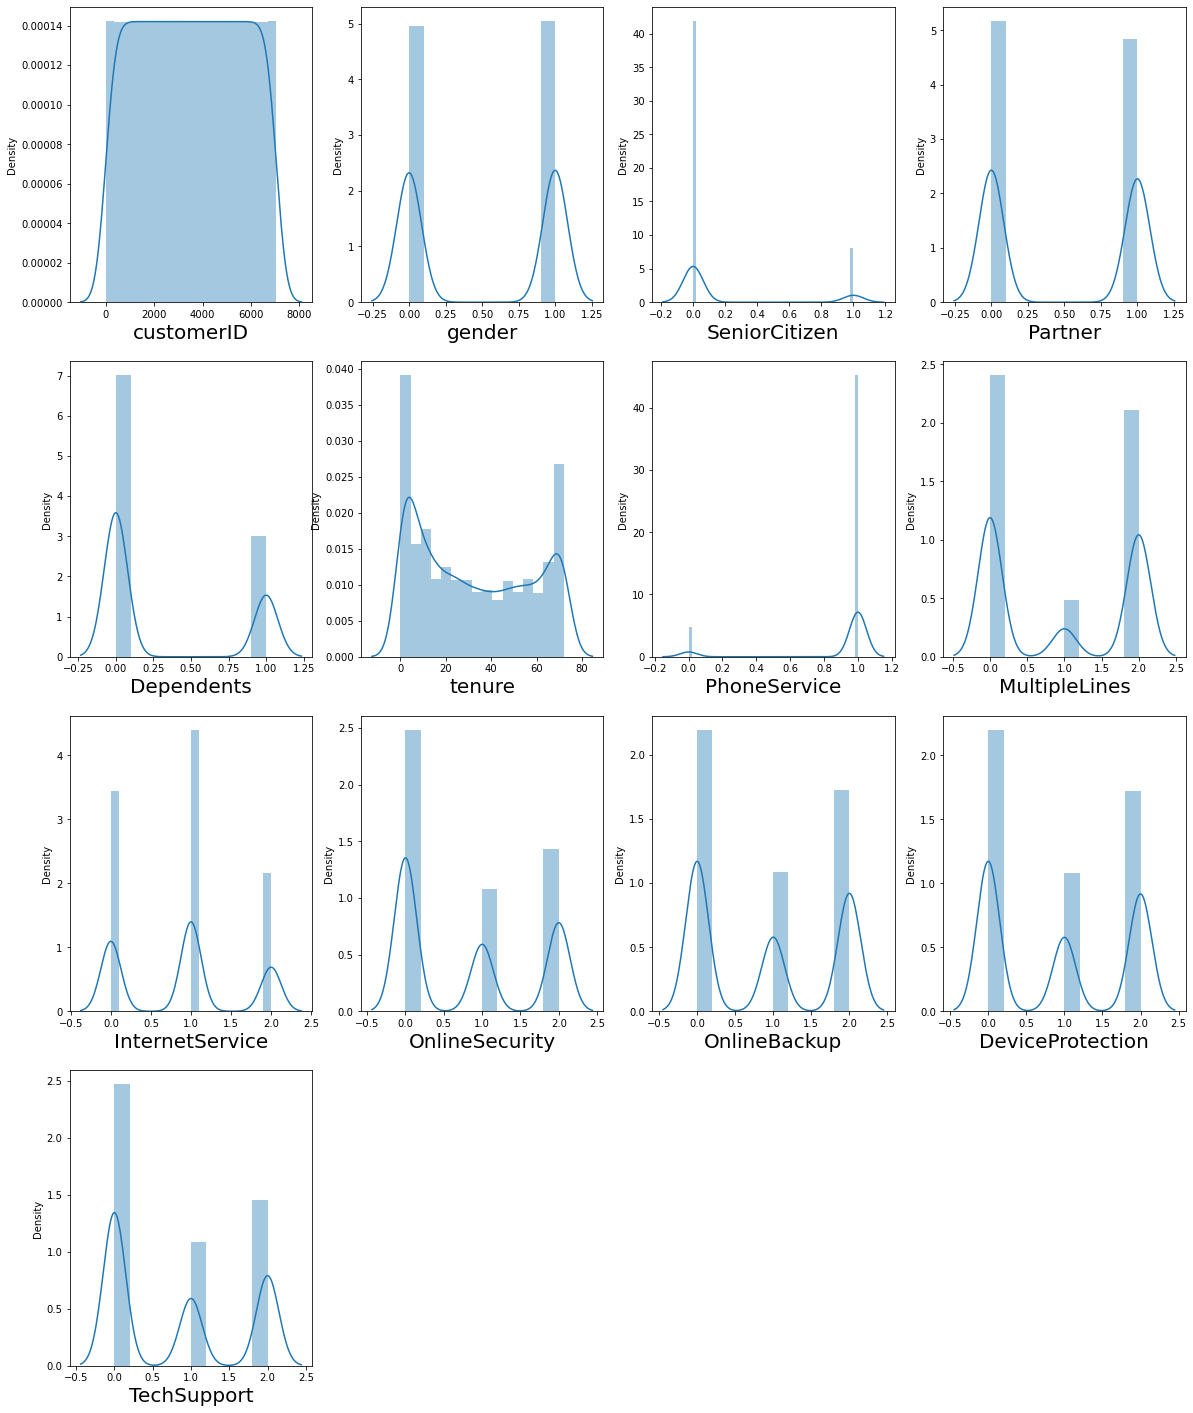

In [21]:
#lets see how data is distributed for every column
plt.figure(figsize=(20,25),facecolor='white')
plotnumber=1

for column in df:
                                    
    if plotnumber<=13:
        ax=plt.subplot(4,4,plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()

### Train Test Split:# Dividing the dataset into independent and dependent data before scaling
     

In [22]:
x=df.drop('Churn',axis=1)
y=df['Churn']

In [23]:
# import libraries for model devloping .
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.model_selection import train_test_split 

In [24]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.metrics import roc_curve,roc_auc_score
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score

### PCA-Principle Component Analysis:
When you have huge number of features, one way to reduce the number of features and probably avoid overfitting is using a feature reduction method such as PCA.

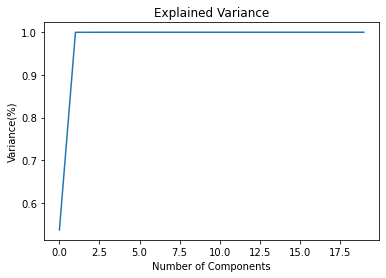

In [25]:
from sklearn.decomposition import PCA
pca=PCA()
pc=pca.fit_transform(x)
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Variance(%)')# for each component
plt.title('Explained Variance')
plt.show()

### Standard Scaler
The next step is to bring the data to a common scale, since there are certain columns with very small values and some columns
with high values. This process is important as values on a similar scale allow the model to learn better.
We use standard scaler for this process

In [26]:
from sklearn.preprocessing import StandardScaler
scale=StandardScaler()
x=scale.fit_transform(x)
x=pd.DataFrame(x)

In [27]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=42)

In [28]:
print(x.shape,x_train.shape,x_test.shape)
print(y.shape,y_train.shape,y_test.shape)

(7043, 20) (5634, 20) (1409, 20)
(7043,) (5634,) (1409,)


In [29]:
lg=LogisticRegression()
lg.fit(x_train,y_train)

LogisticRegression()

In [30]:
pred=lg.predict(x_test)

In [31]:
print('Accuracy Score :',accuracy_score(y_test,pred))

Accuracy Score : 0.8147622427253371


In [32]:
print(confusion_matrix(y_test,pred))

[[940  96]
 [165 208]]


In [33]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.85      0.91      0.88      1036
           1       0.68      0.56      0.61       373

    accuracy                           0.81      1409
   macro avg       0.77      0.73      0.75      1409
weighted avg       0.81      0.81      0.81      1409



In [34]:
for i in range(0,100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=i,test_size=0.20)
    lg.fit(x_train,y_train)
    pred_train=lg.predict(x_train)
    pred_test=lg.predict(x_test)
    if round(accuracy_score(y_train,pred_train)*100,1)==round(accuracy_score(y_test,pred_test)*100,1):
        print("At random state",i,"The model perform very well")
        print("At random_state:-",i)
        print("Accuracy_Score_train :-",accuracy_score(y_train,pred_train)*100)
        print("Accuracy_Score_test :-",accuracy_score(y_test,pred_test)*100)

At random state 46 The model perform very well
At random_state:- 46
Accuracy_Score_train :- 80.56443024494143
Accuracy_Score_test :- 80.62455642299503
At random state 55 The model perform very well
At random_state:- 55
Accuracy_Score_train :- 80.54668086616968
Accuracy_Score_test :- 80.48261178140525
At random state 99 The model perform very well
At random_state:- 99
Accuracy_Score_train :- 80.54668086616968
Accuracy_Score_test :- 80.48261178140525


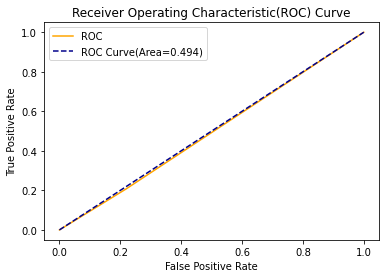

In [35]:
auc=roc_auc_score(y_test,pred)
fpr,tpr,thresholds=roc_curve(y_test,pred)

plt.plot(fpr,tpr,color='orange',label='ROC')
plt.plot([0,1],[0,1],color='darkblue',linestyle='--',label='ROC Curve(Area=%0.3f)'%auc)
plt.xlabel("False Positive Rate")
plt.ylabel('True Positive Rate')
plt.title("Receiver Operating Characteristic(ROC) Curve")
plt.legend()
plt.show()

### Ensemble method :

In [36]:
# Bagging & Boosting:
# We further try fitting the data to classification models to check how our ensemble models perform on the given dataset.
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier

In [37]:
parameters={'loss':['deviance','exponential'],'criterion':['friedman_mse','squared_error']}
gd=GradientBoostingClassifier()

clf=GridSearchCV(gd,parameters)
clf.fit(x_train,y_train)
print(clf.best_params_)
best_result=clf.best_score_
print(best_result)

{'criterion': 'friedman_mse', 'loss': 'deviance'}
0.801741368413919


In [38]:
gd=GradientBoostingClassifier(criterion='friedman_mse',loss='deviance')

gd.fit(x_train,y_train)
gd.score(x_train,y_train)
predgd=gd.predict(x_test)
print(accuracy_score(y_test,predgd))
print(confusion_matrix(y_test,predgd))
print(classification_report(y_test,predgd))

0.7920511000709723
[[915 108]
 [185 201]]
              precision    recall  f1-score   support

           0       0.83      0.89      0.86      1023
           1       0.65      0.52      0.58       386

    accuracy                           0.79      1409
   macro avg       0.74      0.71      0.72      1409
weighted avg       0.78      0.79      0.78      1409



In [39]:
from sklearn.model_selection import KFold

score=cross_val_score(gd,x,y,cv=5)
print(score)
print(score.mean())
print(score.std())

[0.80695529 0.80624556 0.78708304 0.80397727 0.80255682]
0.8013635960384541
0.00731149861413865


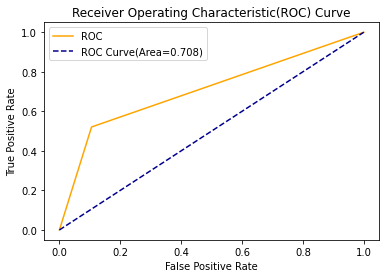

In [40]:
auc=roc_auc_score(y_test,predgd)
fpr,tpr,thresholds=roc_curve(y_test,predgd)

plt.plot(fpr,tpr,color='orange',label='ROC')
plt.plot([0,1],[0,1],color='darkblue',linestyle='--',label='ROC Curve(Area=%0.3f)'%auc)
plt.xlabel("False Positive Rate")
plt.ylabel('True Positive Rate')
plt.title("Receiver Operating Characteristic(ROC) Curve")
plt.legend()
plt.show()

<AxesSubplot:xlabel='Churn', ylabel='count'>

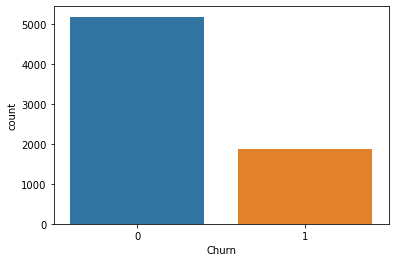

In [41]:
sns.countplot(df['Churn'])
#Our Dataset is not balance

### Balance our DataSet 

In [42]:
from sklearn.utils import resample
#majority and minority classes
df_majority = df[df.Churn==0]
df_minority = df[df.Churn==1]
 
# Upsample minority class
df_minority_upsampled = resample(df_minority, 
                                 replace=True,     # sample with replacement
                                 n_samples=5174,    # to match majority class
                                 random_state=123) # reproducible results
 
# Combine majority class with upsampled minority class
df_upsampled = pd.concat([df_majority, df_minority_upsampled])
 
# Display new class counts
df_upsampled.Churn.value_counts()
# so we balance our dataset and then again check accuracy score.

0    5174
1    5174
Name: Churn, dtype: int64

In [43]:
x=df_upsampled.drop('Churn',axis=1)
y=df_upsampled['Churn']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=42)

### Ensemble method :
       Random Forest Classifier:Hyperparameter Tuning:GRidSearch CV,Model Development,Cross validation

In [44]:
parameters={'n_estimators':[100],'criterion':['gini','entropy']}
rf=RandomForestClassifier()

clf=GridSearchCV(rf,parameters)
clf.fit(x_train,y_train)
print(clf.best_params_)
best_result=clf.best_score_
print(best_result)

{'criterion': 'entropy', 'n_estimators': 100}
0.8834255002408161


In [45]:
rf=RandomForestClassifier(n_estimators=100,criterion='gini')
#rf.RandomForestClassifier()
rf.fit(x_train,y_train)
rf.score(x_train,y_train)
predrf=rf.predict(x_test)
print(accuracy_score(y_test,predrf))
print(confusion_matrix(y_test,predrf))
print(classification_report(y_test,predrf))

0.9072463768115943
[[899 145]
 [ 47 979]]
              precision    recall  f1-score   support

           0       0.95      0.86      0.90      1044
           1       0.87      0.95      0.91      1026

    accuracy                           0.91      2070
   macro avg       0.91      0.91      0.91      2070
weighted avg       0.91      0.91      0.91      2070



In [46]:
#k-fold cross_validation_ score
score=cross_val_score(rf,x,y,cv=5)
print(score)
print(score.mean())
print(score.std())

[0.91062802 0.90724638 0.89130435 0.90671822 0.91251812]
0.9056830180044504
0.007502447792684386


### Random Forest Classifier:
### since cross validation score accuracy score are almost same.we are heading with a good approach.

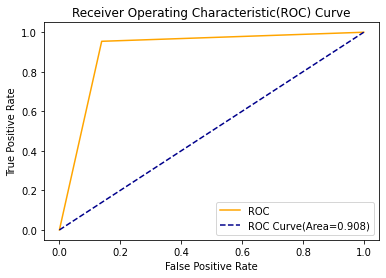

In [47]:
auc=roc_auc_score(y_test,predrf)
fpr,tpr,thresholds=roc_curve(y_test,predrf)

plt.plot(fpr,tpr,color='orange',label='ROC')
plt.plot([0,1],[0,1],color='darkblue',linestyle='--',label='ROC Curve(Area=%0.3f)'%auc)
plt.xlabel("False Positive Rate")
plt.ylabel('True Positive Rate')
plt.title("Receiver Operating Characteristic(ROC) Curve")
plt.legend()
plt.show()

### Ensemble method :AdaBoostClassifier
        Hyperparameter Tuning:GRidSearch CV,Model Development,Cross validation

In [48]:
parameters={'n_estimators':[50],'algorithm':['SAMME','SAMME.R']}
ad=AdaBoostClassifier()

clf=GridSearchCV(ad,parameters)
clf.fit(x_train,y_train)
print(clf.best_params_)
best_result=clf.best_score_
print(best_result)

{'algorithm': 'SAMME.R', 'n_estimators': 50}
0.7666106221813564


In [49]:
ad=AdaBoostClassifier(n_estimators=50,algorithm='SAMME.R')
ad.fit(x_train,y_train)
ad.score(x_train,y_train)
predad=ad.predict(x_test)
print(accuracy_score(y_test,predad))
print(confusion_matrix(y_test,predad))
print(classification_report(y_test,predad))

0.7816425120772947
[[770 274]
 [178 848]]
              precision    recall  f1-score   support

           0       0.81      0.74      0.77      1044
           1       0.76      0.83      0.79      1026

    accuracy                           0.78      2070
   macro avg       0.78      0.78      0.78      2070
weighted avg       0.78      0.78      0.78      2070



In [50]:
#k-fold cross_validation_ score
score=cross_val_score(ad,x,y,cv=5)
print(score)
print(score.mean())
print(score.std())

[0.7589372  0.77439614 0.76086957 0.77187047 0.7839536 ]
0.7700053936299129
0.009200846851250416


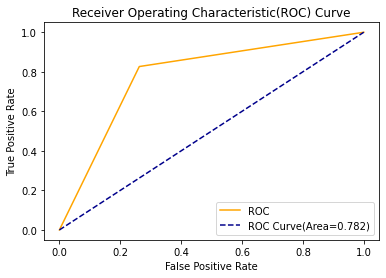

In [51]:
auc=roc_auc_score(y_test,predad)
fpr,tpr,thresholds=roc_curve(y_test,predad)

plt.plot(fpr,tpr,color='orange',label='ROC')
plt.plot([0,1],[0,1],color='darkblue',linestyle='--',label='ROC Curve(Area=%0.3f)'%auc)
plt.xlabel("False Positive Rate")
plt.ylabel('True Positive Rate')
plt.title("Receiver Operating Characteristic(ROC) Curve")
plt.legend()
plt.show()

###  DecisionTreeClassifier :Hyperparameter Tuning:GRidSearch CV,Model Development,Cross validation

In [52]:
from sklearn.model_selection import GridSearchCV
dtc=DecisionTreeClassifier()

grid_param={'criterion':['gini','entropy']}
gd_sr=GridSearchCV(estimator=dtc,param_grid=grid_param,scoring='accuracy',cv=5)
gd_sr.fit(x,y)

best_parameters=gd_sr.best_params_
print(best_parameters)                      #DesicisionTreeClassifier having highest score with cross validation 
best_result=gd_sr.best_score_
print(best_result)
print(round(best_result,2))

{'criterion': 'gini'}
0.8750482741551732
0.88


In [53]:
dtc=DecisionTreeClassifier(criterion='gini')
dtc.fit(x_train,y_train)
dtc.score(x_train,y_train)
preddtc=dtc.predict(x_test)
print(accuracy_score(y_test,preddtc))
print(confusion_matrix(y_test,preddtc))
print(classification_report(y_test,preddtc))

0.8816425120772947
[[854 190]
 [ 55 971]]
              precision    recall  f1-score   support

           0       0.94      0.82      0.87      1044
           1       0.84      0.95      0.89      1026

    accuracy                           0.88      2070
   macro avg       0.89      0.88      0.88      2070
weighted avg       0.89      0.88      0.88      2070



In [54]:
from sklearn.model_selection import cross_val_score

score=cross_val_score(dtc,x,y,cv=5)
print(score)
print(score.mean())
print(score.std())

[0.87487923 0.8763285  0.88309179 0.88351861 0.86950217]
0.8774640599790325
0.005285666157093951


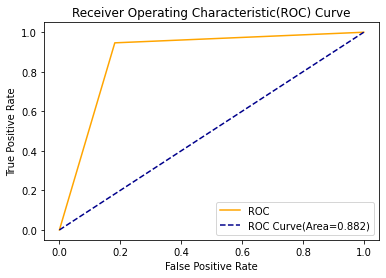

In [55]:
auc=roc_auc_score(y_test,preddtc)
fpr,tpr,thresholds=roc_curve(y_test,preddtc)

plt.plot(fpr,tpr,color='orange',label='ROC')
plt.plot([0,1],[0,1],color='darkblue',linestyle='--',label='ROC Curve(Area=%0.3f)'%auc)
plt.xlabel("False Positive Rate")
plt.ylabel('True Positive Rate')
plt.title("Receiver Operating Characteristic(ROC) Curve")
plt.legend()
plt.show()

### Support vector Machine Model,Cross Validation ,Hyperparameter Tuning

In [56]:
# Support Vector classifier
svc=SVC(kernel='poly')
svc.fit(x_train,y_train)
svc.score(x_train,y_train)
predsvc=svc.predict(x_test)
print(accuracy_score(y_test,predsvc))
print(confusion_matrix(y_test,predsvc))
print(classification_report(y_test,predsvc))

0.5826086956521739
[[925 119]
 [745 281]]
              precision    recall  f1-score   support

           0       0.55      0.89      0.68      1044
           1       0.70      0.27      0.39      1026

    accuracy                           0.58      2070
   macro avg       0.63      0.58      0.54      2070
weighted avg       0.63      0.58      0.54      2070



In [57]:
cv_score=cross_val_score(svc,x,y,cv=5)
cv_mean=cv_score.mean()
cv_mean

0.5706411414882215

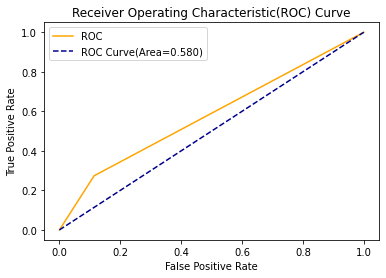

In [58]:
auc=roc_auc_score(y_test,predsvc)
fpr,tpr,thresholds=roc_curve(y_test,predsvc)

plt.plot(fpr,tpr,color='orange',label='ROC')
plt.plot([0,1],[0,1],color='darkblue',linestyle='--',label='ROC Curve(Area=%0.3f)'%auc)
plt.xlabel("False Positive Rate")
plt.ylabel('True Positive Rate')
plt.title("Receiver Operating Characteristic(ROC) Curve")
plt.legend()
plt.show()

###  MultinomialNB GridSearchCV ,Cross Validation ,Model Develop 

In [59]:
parameters={'alpha':[1.0],'fit_prior':['bool']}
mnb=MultinomialNB()
clf=GridSearchCV(mnb,parameters)
clf.fit(x_train,y_train)
print(clf.best_params_)
best_result=clf.best_score_
print(best_result)

{'alpha': 1.0, 'fit_prior': 'bool'}
0.5576224878497308


In [60]:
# MultinomialNB 
mnb=MultinomialNB(alpha=1.0,fit_prior='bool')
mnb.fit(x_train,y_train)
mnb.score(x_train,y_train)
predmnb=mnb.predict(x_test)
print(accuracy_score(y_test,predmnb))
print(confusion_matrix(y_test,predmnb))
print(classification_report(y_test,predmnb))

0.557487922705314
[[602 442]
 [474 552]]
              precision    recall  f1-score   support

           0       0.56      0.58      0.57      1044
           1       0.56      0.54      0.55      1026

    accuracy                           0.56      2070
   macro avg       0.56      0.56      0.56      2070
weighted avg       0.56      0.56      0.56      2070



In [61]:
# KFold Cross Validation
score=cross_val_score(mnb,x,y,cv=5)
print(score)
print(score.mean())
print(score.std())

[0.57198068 0.53429952 0.56425121 0.58095698 0.53117448]
0.5565325730883551
0.020159934106507835


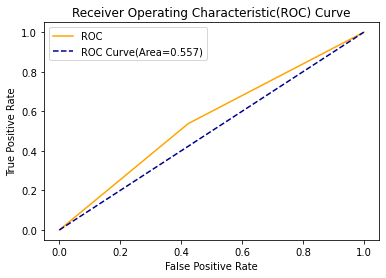

In [62]:
auc=roc_auc_score(y_test,predmnb)
fpr,tpr,thresholds=roc_curve(y_test,predmnb)

plt.plot(fpr,tpr,color='orange',label='ROC')
plt.plot([0,1],[0,1],color='darkblue',linestyle='--',label='ROC Curve(Area=%0.3f)'%auc)
plt.xlabel("False Positive Rate")
plt.ylabel('True Positive Rate')
plt.title("Receiver Operating Characteristic(ROC) Curve")
plt.legend()
plt.show()

### Saving Best Model

In [63]:
# We further proceed to test the object that we saved using joblib or pickle, and create a dataframe of predicted values. 
import pickle 
filename='Customer_Churn_Analysis_IBM.pkl'
pickle.dump(rf,open(filename,'wb'))

### Conclusion:

In [64]:
# Following are the results that we achieve, with an accuracy of 91%.
import numpy as np
a=np.array(y_test)
predicted=np.array(rf.predict(x_test))
dfs=pd.DataFrame({'Original':a,'Predicted':predicted},index=range(len(a)))
dfs

,Original,Predicted
0,1,1
1,0,0
2,1,1
3,1,1
4,1,1
...,...,...
2065,1,1
2066,0,0
2067,0,0
2068,0,0


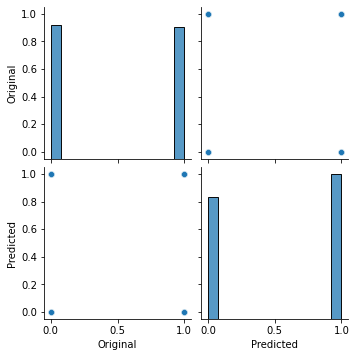

In [65]:
# This marks the end of our process.
# we have successfully trained our model to predict the customer data from IBM Sample Data Sets with the aim of building and 
#comparing several customer churn prediction models with an accuracy of ~91%
sns.pairplot(dfs)